# Default of Credit Card Customers

**Data set information**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


** Client and Business Problem**

Our client, Bank in Taiwan, would like to predict which customers will default next month's based on the data set provided. 

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
data = 'default_of_credit_card_clients.csv'

In [3]:
df = pd.read_csv(data, index_col=0, header=[0,1])

# 1. Data Wrangling 

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.columns

MultiIndex(levels=[['X1', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X2', 'X20', 'X21', 'X22', 'X23', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'], ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'EDUCATION', 'LIMIT_BAL', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'default payment next month']],
           labels=[[0, 11, 16, 17, 18, 19, 20, 21, 22, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 23], [8, 22, 7, 9, 0, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6, 16, 17, 18, 19, 20, 21, 23]],
           names=[None, 'ID'])

In [7]:
df.shape

(30000, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
(X1, LIMIT_BAL)                    30000 non-null int64
(X2, SEX)                          30000 non-null int64
(X3, EDUCATION)                    30000 non-null int64
(X4, MARRIAGE)                     30000 non-null int64
(X5, AGE)                          30000 non-null int64
(X6, PAY_0)                        30000 non-null int64
(X7, PAY_2)                        30000 non-null int64
(X8, PAY_3)                        30000 non-null int64
(X9, PAY_4)                        30000 non-null int64
(X10, PAY_5)                       30000 non-null int64
(X11, PAY_6)                       30000 non-null int64
(X12, BILL_AMT1)                   30000 non-null int64
(X13, BILL_AMT2)                   30000 non-null int64
(X14, BILL_AMT3)                   30000 non-null int64
(X15, BILL_AMT4)                   30000 non-null int64
(X16, BILL_AMT5)                   30000 non-null i

In [9]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


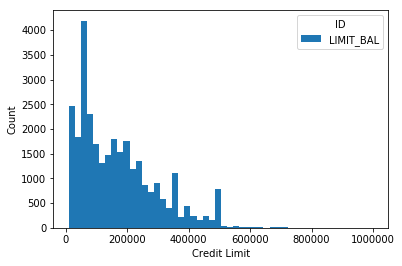

In [10]:
#plot histogram of credit limt
df['X1'].plot(kind='hist', bins=50)
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.show()

In [11]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


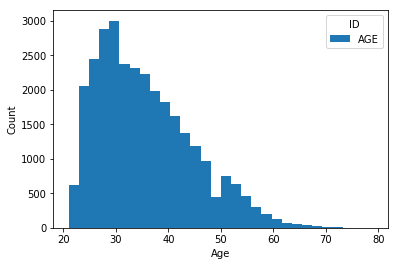

In [12]:
# plot histogram of Age
_ = df.X5.plot(kind='hist', bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

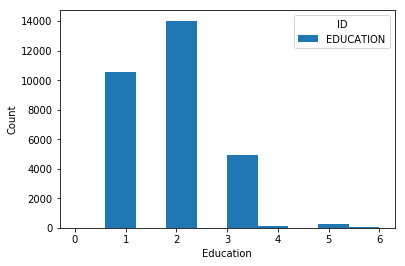

In [13]:
#plot histogram of education
_ = df.X3.plot(kind='hist')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [14]:
df.Y['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [15]:
df.Y.plot(kind='hist')

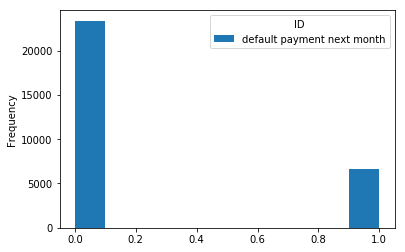

In [16]:
plt.show()

In [17]:
# dropping one of the header rows
df.columns = df.columns.droplevel(0)

In [18]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [21]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [22]:
# replacing values that dont fit in our data set description
df.MARRIAGE.replace(to_replace=0, value=3, inplace=True)
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [23]:
#replacing values that dont fit in our data set description
df.EDUCATION.replace(to_replace=(5, 6, 0), value=4, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [24]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [25]:
# changing columns into categorical values
df.SEX = df.SEX.astype('category')
df.EDUCATION = df.EDUCATION.astype('category')
df.MARRIAGE = df.MARRIAGE.astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1       

In [27]:
# changing default payment into a categorical variable
df['default payment next month'] = df['default payment next month'].astype('category')

In [28]:
# payment status column
df.iloc[:, 5:11].apply(pd.value_counts)

ID,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


In [29]:
# setting a variable for Payment Status
pmt_status = df.iloc[:, 5:11]
pmt_status.describe()

ID,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [30]:
# setting a variable for Bill Amount
bill_amt = df.iloc[:, 11:17]
bill_amt.describe()

ID,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [31]:
# setting a variable for payment history
pmt_hist = df.iloc[:, 17:23]

# Payment history information
pmt_hist.describe()

ID,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In general, this data set was pretty clean and it didn't require major cleaning efforts. 

- Dropped one of the header rows
- Education column had one extra categories 0, 5, 6  which had only 345 values so I combined with catgery 4 which is an other category.
- Marriage column had undefined 0 category which had only 54 rows so I merged it to 3 which is an other category.
- Changed data types of columns with categorical values  (gender, education, marriage status).

# 2. Data Story

In [32]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


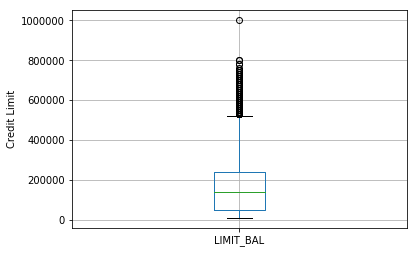

In [33]:
#Boxplot for Credit Limit by customers
df.boxplot(column='LIMIT_BAL')
plt.ylabel('Credit Limit')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


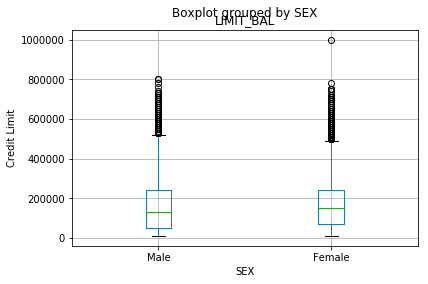

In [34]:
#Boxplot for Credit limit sorted by Gender Type
df.boxplot(column='LIMIT_BAL', by = 'SEX')
plt.ylabel('Credit Limit')
plt.xticks([1, 2], ['Male', 'Female'])
plt.show()

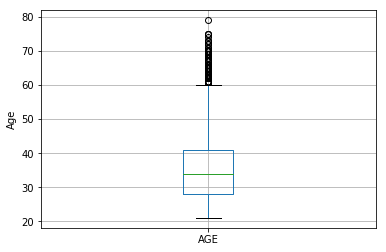

In [35]:
# Boxplot for customer Age distribution
df.boxplot(column='AGE')
plt.ylabel('Age')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


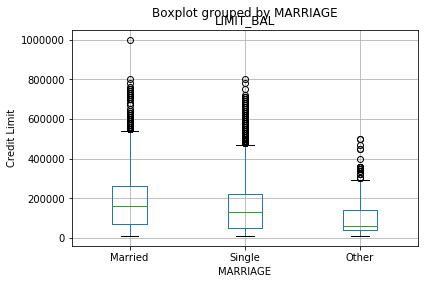

In [36]:
# Boxplot for Credit imit sorted by Marriage status
df.boxplot(column='LIMIT_BAL', by = 'MARRIAGE')
plt.ylabel('Credit Limit')
plt.xticks([1, 2, 3], ['Married', 'Single', 'Other'])
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


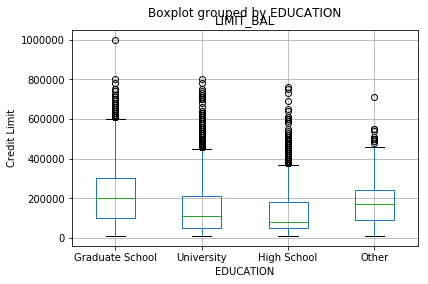

In [37]:
#Boxplot for customer credit limit sorted by Education type
df.boxplot(column='LIMIT_BAL', by = 'EDUCATION')
plt.ylabel('Credit Limit')
plt.xticks([1, 2, 3, 4], ['Graduate School', 'University', 'High School', 'Other'])
plt.show()

**Payment Status**

Let's take a look at payment history of last 6 months below.

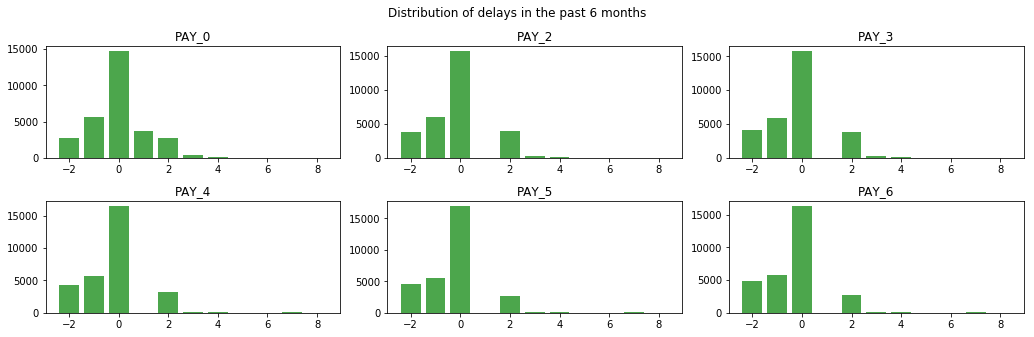

In [38]:
# payment status columns
pattern = re.compile("^PAY_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of delays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

**Billing Amounts**

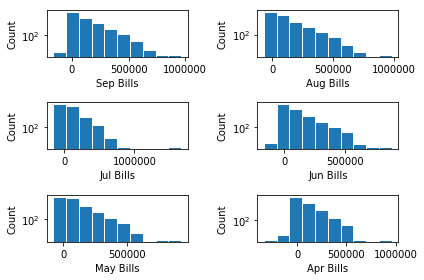

In [39]:
# plot subplots for billing amounts

plt.subplot(3, 2, 1)
_ = plt.hist(bill_amt['BILL_AMT1'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Sep Bills')
plt.ylabel('Count')

plt.subplot(3, 2, 2)
_ = plt.hist(bill_amt['BILL_AMT2'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Aug Bills')
plt.ylabel('Count')

plt.subplot(3, 2, 3)
_ = plt.hist(bill_amt['BILL_AMT3'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Jul Bills')
plt.ylabel('Count')

plt.subplot(3, 2, 4)
_ = plt.hist(bill_amt['BILL_AMT4'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Jun Bills')
plt.ylabel('Count')

plt.subplot(3, 2, 5)
_ = plt.hist(bill_amt['BILL_AMT5'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('May Bills')
plt.ylabel('Count')

plt.subplot(3, 2, 6)
_ = plt.hist(bill_amt['BILL_AMT6'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Apr Bills')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Payment Amounts**

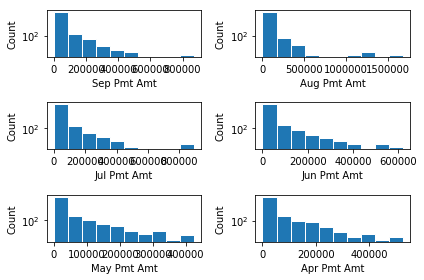

In [40]:
# plot subplots for payment history
plt.subplot(3, 2, 1)
_ = plt.hist(pmt_hist['PAY_AMT1'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Sep Pmt Amt')
plt.ylabel('Count')

plt.subplot(3, 2, 2)
_ = plt.hist(pmt_hist['PAY_AMT2'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Aug Pmt Amt')
plt.ylabel('Count')

plt.subplot(3, 2, 3)
_ = plt.hist(pmt_hist['PAY_AMT3'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Jul Pmt Amt')
plt.ylabel('Count')

plt.subplot(3, 2, 4)
_ = plt.hist(pmt_hist['PAY_AMT4'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Jun Pmt Amt')
plt.ylabel('Count')

plt.subplot(3, 2, 5)
_ = plt.hist(pmt_hist['PAY_AMT5'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('May Pmt Amt')
plt.ylabel('Count')

plt.subplot(3, 2, 6)
_ = plt.hist(pmt_hist['PAY_AMT6'], bins=10, log=True, histtype='bar', ec='white')
plt.xlabel('Apr Pmt Amt')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

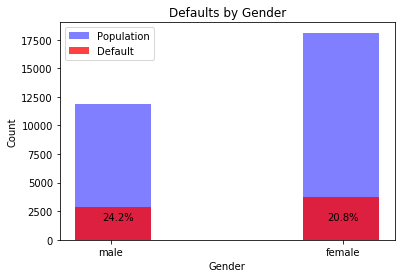

In [41]:
# loans by gender
by_gender = df.SEX

# defaulted loans by gender
def_by_gender = df[df['default payment next month'] == 1].SEX

# plot hisogram of defaults by gender
plt.figure("Defaults by Gender")
_ = plt.hist(by_gender, color='blue', alpha=0.5, bins=4)
_ = plt.hist(def_by_gender, color = 'red', alpha=0.75, bins=4)
plt.title('Defaults by Gender')
plt.legend(('Population', 'Default'))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([1.118, 1.88], ['male', 'female'])
plt.annotate('24.2%', xy=(1.09, 1700))
plt.annotate('20.8%', xy=(1.83, 1700))
plt.show()

In [42]:
# defaults by gender
def_by_gender.value_counts() / by_gender.value_counts()

2    0.207763
1    0.241672
Name: SEX, dtype: float64

**Default rates by gender**
- Male customers have higher default rate of 24.16% compared to female customers' 20.78% default rate.

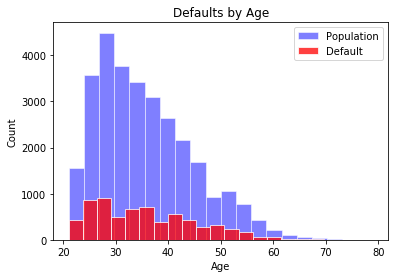

In [43]:
# defining variables for age and defaults by age
age= df['AGE']
def_by_age = df.AGE[df['default payment next month'] == 1]

#plotting a histogram
_ = plt.hist(age, color='blue', alpha=0.5, bins=20, ec='white')
_ = plt.hist(def_by_age, color = 'red', alpha=0.75, bins=20, ec='white')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Defaults by Age')
plt.legend(('Population', 'Default'))
plt.show()

In [44]:
# default rate for customers under age 25
np.sum(def_by_age < 25) / (np.sum(age < 25)) 

0.27188081936685288

In [45]:
# default rate for customers over age 25
np.sum(def_by_age > 25) / (np.sum(age > 25))

0.21447433885720846

**Default rate by age group** 
- Customers under age of 25 have a higher default rate of 27.19% than customers aged over 25 which has a default rate of 21.45%.

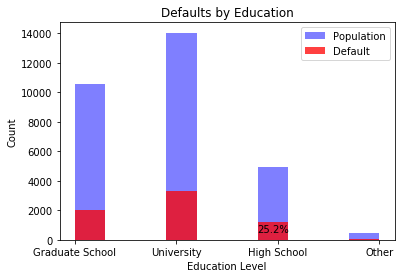

In [46]:
# plot histogram of defaults by education level
def_by_ed = df.EDUCATION[df['default payment next month'] == 1]
ed = df.EDUCATION
_ = plt.hist(ed, alpha=0.5, color='blue')
_ = plt.hist(def_by_ed, alpha=0.75, color = 'red')
plt.title('Defaults by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(('Population', 'Default'))
plt.xticks([1, 2, 3, 4], ['Graduate School', 'University', 'High School', 'Other'])
plt.annotate('25.2%', xy=(2.8, 500))
plt.show()

In [47]:
# default rates by Education level
def_by_ed.value_counts() / ed.value_counts()

2    0.237349
1    0.192348
3    0.251576
4    0.070513
Name: EDUCATION, dtype: float64

**Defaults rates by education level** 
1. Graduate school = 19.23%  
2. University = 23.73% 
3. **High school = 25.16%** 
4. Others = 7.05%

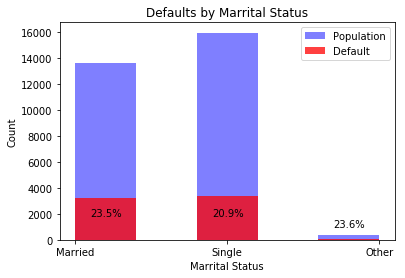

In [48]:
# plot histogram of defaults by marital status
def_by_ms = df.MARRIAGE[df['default payment next month'] == 1]
marriage = df.MARRIAGE
_ = plt.hist(marriage, alpha=0.5, color='blue', bins=5)
_ = plt.hist(def_by_ms, alpha=0.75, color = 'red', bins=5)
plt.title('Defaults by Marrital Status')
plt.xlabel('Marrital Status')
plt.ylabel('Count')
plt.legend(('Population', 'Default'))
plt.xticks([1, 2, 3], ['Married', 'Single', 'Other'])
plt.annotate('23.5%', xy=(1.1, 1800))
plt.annotate('20.9%', xy=(1.9, 1800))
plt.annotate('23.6%', xy=(2.7, 1000))
plt.show()

In [49]:
# default rates by marrital status
# 1 = married; 2 = single; 3 = others
def_by_ms.value_counts() / marriage.value_counts()

2    0.209283
1    0.234717
3    0.236074
Name: MARRIAGE, dtype: float64

**Default rate by marital status**

1. Married default rate = 23.47%
2. Single default rate = 20.93%
3. Other default rate = **23.61%**

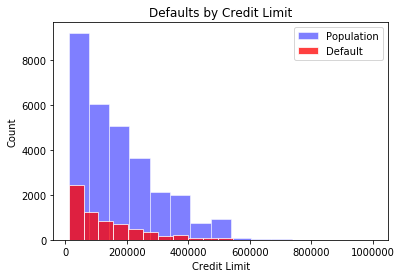

In [50]:
# defining variables for credit limit and defaults by credit limit
credit = df['LIMIT_BAL']
def_by_cred = df['LIMIT_BAL'][df['default payment next month'] == 1]

#plotting a histogram
_ = plt.hist(credit, color='blue', alpha=0.5, bins=15, ec='white')
_ = plt.hist(def_by_cred, color = 'red', alpha=0.75, bins=15, ec='white')
plt.title('Defaults by Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.legend(('Population', 'Default'))
plt.show()

In [51]:
def_by_cred.describe()

count      6636.000000
mean     130109.656420
std      115378.540571
min       10000.000000
25%       50000.000000
50%       90000.000000
75%      200000.000000
max      740000.000000
Name: LIMIT_BAL, dtype: float64

In [52]:
credit.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

# 3. Exploratory Data Analysis 
        Applying Inferential Statistics techniques

In [53]:
# writing a function to compute the ECDF (Empirical cumulative distribution function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

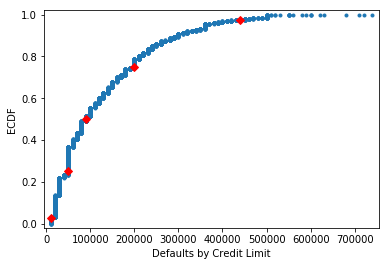

In [54]:
# compute ECDF of defaults by Credit limit
x_cl, y_cl = ecdf(def_by_cred)

# Generate plot
_ = plt.plot(x_cl, y_cl, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('Defaults by Credit Limit')

# overlay percentiles as red diamonds
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_cl = np.percentile(def_by_cred, percentiles)
_ = plt.plot(ptiles_cl, percentiles/100, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()

Let's find out if Defaults by Credit Limit is normally distributed. 

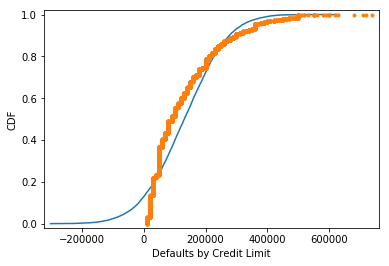

In [55]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(def_by_cred)
sigma = np.std(def_by_cred)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(def_by_cred)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Defaults by Credit Limit')
_ = plt.ylabel('CDF')
plt.show()

Looks like Defaults by Credit Limit is not normally distributed.

In [56]:
# creating 1D array for linear regression
bill_amt_arr = bill_amt.values.flatten()
pmt_hist_arr = pmt_hist.values.flatten()

slope = 0.0331549352865 Payment Amount / Billing Amount
intercept = 3784.02438696 Payment Amount


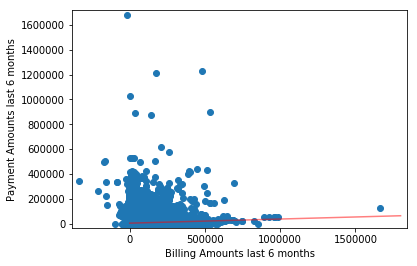

In [57]:
# plot scatter plot of billing history vs payment history
_ = plt.scatter(bill_amt_arr, pmt_hist_arr)
plt.margins(0.02)
plt.xlabel('Billing Amounts last 6 months')
plt.ylabel('Payment Amounts last 6 months')
plt.xticks([0, 500000, 1000000, 1500000])

# perform linear regression
a, b = np.polyfit(bill_amt_arr, pmt_hist_arr, 1)

#print results to the screen
print('slope =', a, 'Payment Amount / Billing Amount')
print('intercept =', b, 'Payment Amount')

# Make theoretical line to plot
x_1 = np.array([0,1800000])
y_1 = a * x_1 + b

# add regression line to the plot
_ = plt.plot(x_1, y_1, color='red', alpha=0.5)

plt.show()

Looks like as payment amounts are trending upwards with higher bills.

In [58]:
# computing Pearson correlation coefficient between payment and billing amounts

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

r = pearson_r(bill_amt_arr, pmt_hist_arr)

# Print the result
print(r)


0.12416110018


There is a positive correlation between billing amounts and payment amounts.

In [59]:
# calculating customers who are in default status as of PAY_O or Sep 2015
current_def_customers = np.sum(pmt_status['PAY_0'] > 0)
current_def_customers

6818

In [60]:
# Sep 2015 default rate
current_def_customers / len(pmt_status)

0.22726666666666667

**My findngs:**

- As of Sep 2005 (PAY_0), customers that are on default status (1 or more month behind payment) are approx. 22.7%.
- Male customers have higher default rate of 24.16% compared to female customers' default rate of 20.78%.
- Customers under age of 25 have a higher default rate of 27.19% than customers aged over 25 which has a default rate of 21.45%.
- Customers with high school have highest default rate of 25.16% than other education categories.
- Married and other category customer had higher default rate than single customers.
- Defaults by Credit Limit is not normally distributed.
- Billing Amounts and Payments Amounts are positively correlated; there is gradual increase of Payment Amounts as Billing Amounts increase.


In [61]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 4. In-depth analysis using machine learning

**Logistic Regression**

In [62]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [63]:
# Create arrays for the features and the response variable
y = df['default payment next month']
X = df.drop('default payment next month', axis=1)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=21)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7687    1]
 [2212    0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.87      7688
          1       0.00      0.00      0.00      2212

avg / total       0.60      0.78      0.68      9900



In [64]:
# Hyperparameter tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 11787686.347935867}
Best score is 0.7788


In [65]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 21)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.7275937203149381, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.8067222222222222


**KNN Classifier**

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 10 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=35)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))
print(classification_report(y_test, knn.predict(X_test)))

0.7785
             precision    recall  f1-score   support

          0       0.79      0.98      0.87      9337
          1       0.51      0.08      0.14      2663

avg / total       0.73      0.78      0.71     12000



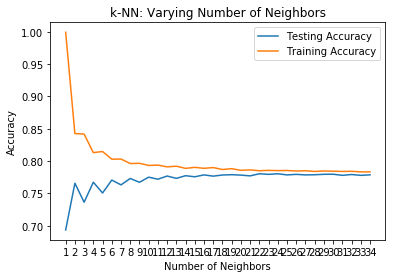

In [67]:
# Finding the optimal # of neighbors

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 35)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.show()

*It looks like the test accuracy is highest when using 34 neighbors*

**Linear SVM**

In [68]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)

accuracy=clf.score(X_test,y_test)
print("SVM accuracy:",accuracy)
print(classification_report(y_test, clf.predict(X_test)))

SVM accuracy: 0.778166666667
             precision    recall  f1-score   support

          0       0.78      1.00      0.87      9337
          1       0.51      0.01      0.02      2663

avg / total       0.72      0.78      0.69     12000



**Decision Tree Classifier**

In [69]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

accuracy=clf.score(X_test,y_test)
print("Decision Tree accuracy",accuracy)
print(classification_report(y_test, clf.predict(X_test)))

Decision Tree accuracy 0.724
             precision    recall  f1-score   support

          0       0.83      0.81      0.82      9337
          1       0.39      0.41      0.40      2663

avg / total       0.73      0.72      0.73     12000



**Random Forest Classifier**

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True,
                            n_jobs=1, random_state=1, verbose=0, warm_start=False, class_weight=None)

clf.fit(X_train,y_train)

accuracy=clf.score(X_test,y_test)
print("Random Forest accuracy:",accuracy)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest accuracy: 0.820916666667
[[8809  528]
 [1621 1042]]
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      9337
          1       0.66      0.39      0.49      2663

avg / total       0.80      0.82      0.80     12000



Trying SMOTE to improve my RandomForestClassifier

In [71]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

clf.fit(x_train_res, y_train_res)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[[8664  673]
 [1539 1124]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      9337
          1       0.63      0.42      0.50      2663

avg / total       0.80      0.82      0.80     12000



After using SMOTE my recall rate improves by 4% which is good in this case because predicting defaults is much more important. 

In [72]:
accuracy=clf.score(X_test, y_test)
print("Random Forest accuracy w SMOTE:",accuracy)

Random Forest accuracy w SMOTE: 0.815666666667


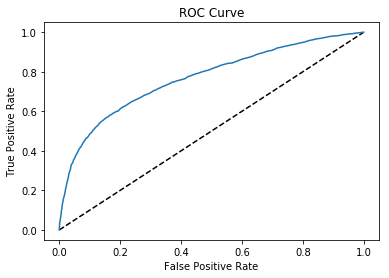

In [73]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [74]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7673017130373905


** Deep Learning with Keras**

In [89]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = X.shape[1]

early_stopping_monitor = EarlyStopping(patience=2)

# Set up predictor and target variables
predictors = np.array(X)
target = to_categorical(y)

# Set up the model
model = Sequential()

# Add the layers
model.add(Dense(12, activation='relu', input_shape=(n_cols,), kernel_initializer='uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
#model.add(Dense(1, activation='sigmo', kernel_initializer='uniform'))


# Add the output layer
model.add(Dense(2, activation='softmax', kernel_initializer='uniform'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target, validation_split=0.3,
          epochs=20, callbacks = [early_stopping_monitor])

Train on 21000 samples, validate on 9000 samples
Epoch 1/20
21000/21000 [==============================] - 3s 153us/step - loss: 0.6263 - acc: 0.7629 - val_loss: 0.4960 - val_acc: 0.7956
Epoch 2/20
21000/21000 [==============================] - 3s 142us/step - loss: 0.5249 - acc: 0.7715 - val_loss: 0.5097 - val_acc: 0.7956
Epoch 3/20
21000/21000 [==============================] - 3s 143us/step - loss: 0.5215 - acc: 0.7716 - val_loss: 0.4865 - val_acc: 0.7956
Epoch 4/20
21000/21000 [==============================] - 3s 137us/step - loss: 0.5210 - acc: 0.7716 - val_loss: 0.4887 - val_acc: 0.7956
Epoch 5/20
21000/21000 [==============================] - 3s 143us/step - loss: 0.5226 - acc: 0.7716 - val_loss: 0.4847 - val_acc: 0.7956
Epoch 6/20
21000/21000 [==============================] - 3s 137us/step - loss: 0.5206 - acc: 0.7716 - val_loss: 0.5080 - val_acc: 0.7956
Epoch 7/20
21000/21000 [==============================] - 3s 139us/step - loss: 0.5196 - acc: 0.7716 - val_loss: 0.4860 - v

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                288       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 18        
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________


In conclusion, using RandomForest Classifier with SMOTE yields the best result with Accuracy Score of 82% and recall rate of 42%. Improvement in recall is important in this case because our customer will most likely care more about predicting actual defualts (TP).